In [1]:
import numpy as np
import matplotlib.pyplot as plt
import knn
import load_cifar
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2

data_dir = 'F:\ML\Winter-2016-CS231N-master\Assignment1\cs231n\datasets\cifar-10-batches-py'

In [2]:
Xtr ,ytr ,Xte, yte = load_cifar.load(data_dir)
print ('Xtrain shape:', Xtr.shape)
print ('Ytrain shape:', ytr.shape)
print ('Xtest shape:', Xte.shape)
print ('Ytest shape:', yte.shape)
#np.array_equal(yte,yte1)

Xtrain shape: (50000, 32, 32, 3)
Ytrain shape: (50000,)
Xtest shape: (10000, 32, 32, 3)
Ytest shape: (10000,)


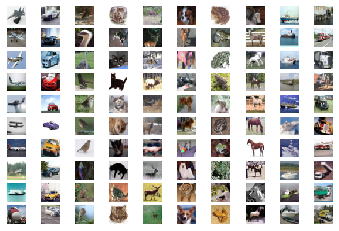

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
num_samples = 10
for i, c in enumerate(classes):
    indexes = np.flatnonzero(ytr == i)
    random_indexes = np.random.choice(indexes, num_samples, replace="false")
    for j, p in enumerate(random_indexes):
        plt_indexes = j * num_classes + i + 1
        plt.subplot(num_classes, num_samples, plt_indexes)
        plt.imshow(Xtr[p].astype("uint8"))
        plt.axis('off')
plt.show()


In [23]:
a = np.array([1,2,3,5,1,3,4])
b = np.flatnonzero(a==1)
print (type(b))
print (np.random.choice(b,1))
#max(set(a),key = (a.count))


<class 'numpy.ndarray'>
[4]


In [7]:
#subsample for calculations simplicity

Xtr = Xtr[:5000]
ytr = ytr[:5000]

Xte = Xte[:500]
yte = yte[:500]

#make pictures rows
Xtr = Xtr.reshape(5000,-1)
Xte = Xte.reshape(500,-1)

print ('Xtrain shape:', Xtr.shape)
print ('Ytrain shape:', ytr.shape)
print ('Xtest shape:', Xte.shape)
print ('Ytest shape:', yte.shape)

Xtrain shape: (5000, 3072)
Ytrain shape: (5000,)
Xtest shape: (500, 3072)
Ytest shape: (500,)


In [81]:
d1 = knn.compute_distances_one_loop(Xtr,Xte)

d2 = knn.compute_distances_no_loop(Xtr,Xte)
np.array_equal(d1,d2)

True

In [27]:
acc = knn.predict(Xtr,ytr,Xte,yte,5,d2)
acc

0.278

In [77]:
a = np.zeros((20,5))
b = np.ones((5,5))
a = np.array_split(a,4)
c = np.concatenate(np.concatenate((a[:2],a[3:])))

c.shape
#Xtr_folds = np.array_split(Xtr,num_folds)


(15, 5)

In [122]:
ks = [1, 5, 7, 10, 12, 15, 20, 30, 50, 70, 100]
for k in ks:
    acc_dict[k] = []
    for i in range(num_folds):
        if len(Xtr_folds[i + 1 :]) is 0:
            x = np.concatenate(Xtr_folds[:i])
            y = np.concatenate(ytr_folds[:i])
        elif len(Xtr_folds[:i]) is 0:
            x = np.concatenate(Xtr_folds[i + 1 :])
            y = np.concatenate(ytr_folds[i + 1 :])
        else:
            x = np.concatenate(np.concatenate((Xtr_folds[:i], Xtr_folds[i + 1 :])))
            y = np.concatenate(np.concatenate((ytr_folds[:i], ytr_folds[i + 1 :])))

        acc_dict[k].append(knn.predict(x, y, Xtr_folds[i], ytr_folds[i], k))
acc_dict

{1: [0.263, 0.257, 0.264, 0.278, 0.266],
 5: [0.256, 0.271, 0.28, 0.289, 0.278],
 10: [0.266, 0.296, 0.279, 0.283, 0.283],
 15: [0.253, 0.29, 0.279, 0.28, 0.275],
 7: [0.261, 0.288, 0.276, 0.286, 0.278],
 12: [0.261, 0.294, 0.28, 0.283, 0.28],
 20: [0.27, 0.279, 0.279, 0.28, 0.284],
 30: [0.272, 0.272, 0.286, 0.265, 0.272],
 50: [0.271, 0.288, 0.278, 0.269, 0.266],
 70: [0.264, 0.273, 0.268, 0.268, 0.269],
 100: [0.256, 0.27, 0.263, 0.256, 0.263]}

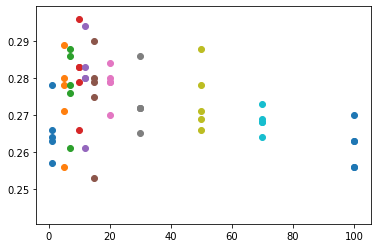

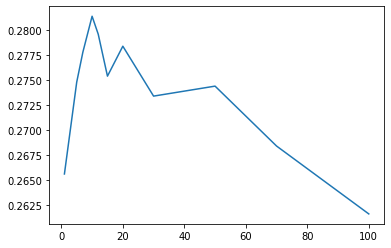

In [143]:
for k in ks:
    plt.scatter([k] * len(acc_dict[k]),acc_dict[k])
plt.show()
a = []
for k in ks:
    a.append(np.mean(acc_dict[k]))
plt.plot(ks,a)
plt.show()

In [144]:
final_acc = knn.predict(Xtr,ytr,Xte,yte,10)
final_acc

0.282